# Cancer networks and data

This notebook will demonstrate network retrieval from the STRING database, basic analysis, TCGA data loading and visualization in Cytoscape from Python using the py4cytoscape package.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cytoscape/py4cytoscape/blob/0.0.10/doc/tutorials/Cancer-networks-and-data.ipynb)

**by Kozo Nishida, Alexander Pico, Barry Demchak**

**py4cytoscape 0.0.10**

## Prerequisites
In addition to this package (py4cytoscape), you will need:

- Cytoscape 3.8 or greater, which can be downloaded from https://cytoscape.org/download.html. Simply follow the installation instructions on screen.
- Complete installation wizard
- Launch Cytoscape
- Install **FileTransfer App** (Follow [here](https://py4cytoscape.readthedocs.io/en/0.0.10/tutorials/index.html) to do it.)

**NOTE: To run this notebook, you must manually start Cytoscape first – don’t proceed until you have started Cytoscape.**

### Setup required only in a remote notebook environment

If you’re using a remote Jupyter Notebook environment such as Google Colab, run the cell below. (If you’re running a local Jupyter Notebook server on the desktop machine same with Cytoscape, you don’t need to do that.)


In [ ]:
_PY4CYTOSCAPE = 'git+https://github.com/cytoscape/py4cytoscape@0.0.10'
import requests
exec(requests.get("https://raw.githubusercontent.com/cytoscape/jupyter-bridge/master/client/p4c_init.py").text)
IPython.display.Javascript(_PY4CYTOSCAPE_BROWSER_CLIENT_JS) # Start browser client

In [1]:
import py4cytoscape as p4c

In [2]:
p4c.cytoscape_ping()

You are connected to Cytoscape!


'You are connected to Cytoscape!'

In [ ]:
p4c.install_app('STRINGapp')

## Getting Disease Networks

Use Cytoscape to query the STRING database for networks of genes associated with breast cancer and ovarian cancer.

**If the STRING app is not installed, no error is reported, but your network will be empty**

### Query STRING database by disease to generate networks
#### Breast cancer

In [3]:
string_cmd = 'string disease query disease="breast cancer" cutoff=0.9 species="Homo sapiens" limit=150'
p4c.commands_run(string_cmd)

["Loaded network 'STRING network - breast cancer' with 150 nodes and 877 edges"]

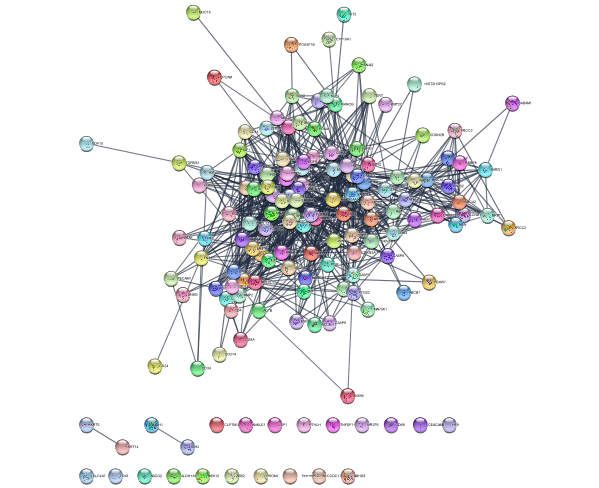

In [4]:
p4c.notebook_show_image()

Here we are using Cytoscape’s command line syntax, which can be used for any core or app automation function, and then making a GET request. Use *p4c.commands_help* to interrogate the functions and parameters available in your active Cytoscape session, including the apps you’ve installed!

In [5]:
p4c.commands_help('string')

['add nodes',
 'change confidence',
 'change type',
 'compound query',
 'disease query',
 'enable glass',
 'expand',
 'filter enrichment',
 'hide charts',
 'list species',
 'make string',
 'protein query',
 'pubmed query',
 'retrieve enrichment',
 'retrieve publications',
 'settings',
 'show charts',
 'show enrichment',
 'show images',
 'show labels',
 'show publications',
 'stringify',
 'version']

In [6]:
p4c.commands_help('string disease query')

['cutoff', 'disease', 'limit', 'networkType', 'species', 'taxonID']

#### Ovarian cancer

In [7]:
string_cmd = 'string disease query disease="ovarian cancer" cutoff=0.9 species="Homo sapiens" limit=150'
p4c.commands_run(string_cmd)

["Loaded network 'STRING network - ovarian cancer' with 150 nodes and 754 edges"]

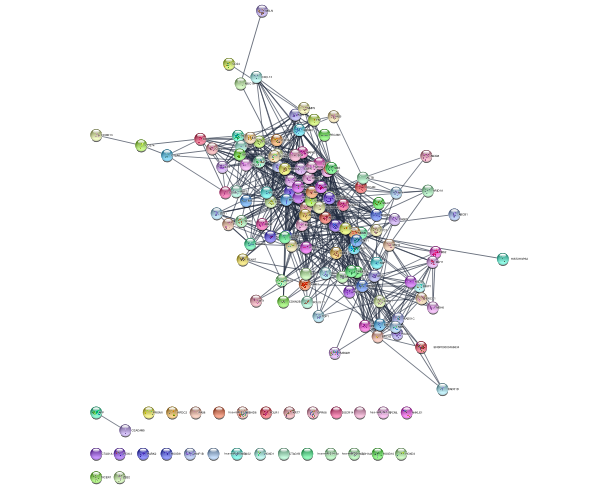

In [8]:
p4c.notebook_show_image()

## Interacting with Cytoscape
Now that we’ve got a couple networks into Cytoscape, let’s see what we can do with them from Python…

### Get list of networks

In [9]:
p4c.get_network_list()

['STRING network - breast cancer', 'STRING network - ovarian cancer']

### Layout network

In [10]:
p4c.layout_network(layout_name='circular')

{}

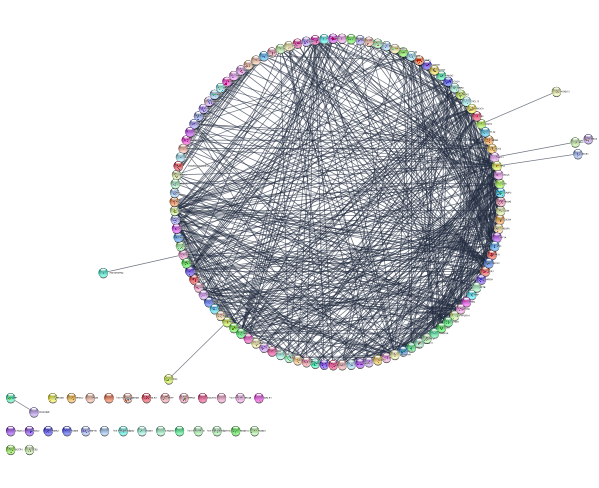

In [11]:
p4c.notebook_show_image()

#### List of layout algorithms available

In [12]:
p4c.get_layout_names()

['attribute-circle',
 'fruchterman-rheingold-3D',
 'stacked-node-layout',
 'spherical',
 'degree-circle',
 'circular',
 'box',
 'attributes-layout',
 'kamada-kawai',
 'force-directed',
 'grid3D',
 'cose',
 'flatten',
 'grid',
 'hierarchical',
 'center3d',
 'fruchterman-rheingold',
 'isom',
 'force-directed-cl']

#### Layout with parameters!

In [13]:
p4c.get_layout_property_names(layout_name='force-directed')

['numIterations',
 'defaultSpringCoefficient',
 'defaultSpringLength',
 'defaultNodeMass',
 'isDeterministic',
 'singlePartition']

In [14]:
p4c.layout_network('force-directed defaultSpringCoefficient=0.0000008 defaultSpringLength=70')

{}

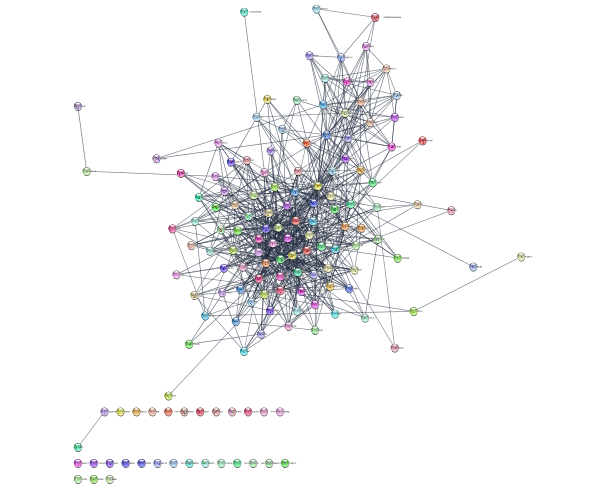

In [15]:
p4c.notebook_show_image()

### Get table data from network

Now, let’s look at the tablular data associated with our STRING networks…

In [16]:
p4c.get_table_column_names('node')

['SUID',
 'shared name',
 'name',
 'selected',
 'stringdb::canonical name',
 'display name',
 'stringdb::full name',
 'stringdb::database identifier',
 'stringdb::description',
 '@id',
 'stringdb::namespace',
 'stringdb::node type',
 'query term',
 'stringdb::sequence',
 'stringdb::species',
 'stringdb::STRING style',
 'stringdb::enhancedLabel Passthrough',
 'compartment::cytoskeleton',
 'compartment::cytosol',
 'compartment::endoplasmic reticulum',
 'compartment::endosome',
 'compartment::extracellular',
 'compartment::golgi apparatus',
 'compartment::lysosome',
 'compartment::mitochondrion',
 'compartment::nucleus',
 'compartment::peroxisome',
 'compartment::plasma membrane',
 'stringdb::structures',
 'target::development level',
 'target::family',
 'tissue::adrenal gland',
 'tissue::blood',
 'tissue::bone',
 'tissue::bone marrow',
 'tissue::eye',
 'tissue::gall bladder',
 'tissue::heart',
 'tissue::intestine',
 'tissue::kidney',
 'tissue::liver',
 'tissue::lung',
 'tissue::muscle',


One of the great things about the STRING database is all the node and edge attriubtes they provide. Let’s pull some of it into Python to play with…

#### Retrieve disease scores
We can retrieve any set of columns from Cytoscape and store them as a Python pandas.DataFrame keyed by SUID. In this case, let’s retrieve the disease score column from the node table. Those will be our two parameters:

In [21]:
disease_score_table = p4c.get_table_columns('node','stringdb::disease score')

In [22]:
disease_score_table

,stringdb::disease score
2304,2.645192
2305,2.802262
2306,2.556009
2307,5.0
2308,2.476258
...,...
2299,2.688657
2300,2.527034
2301,3.200604
2302,2.558843


In [24]:
disease_score = disease_score_table['stringdb::disease score'].astype('float')
node_suid = disease_score_table.index.values.astype(str)

In [25]:
disease_score

2304    2.645192
2305    2.802262
2306    2.556009
2307    5.000000
2308    2.476258
          ...   
2299    2.688657
2300    2.527034
2301    3.200604
2302    2.558843
2303    2.525171
Name: stringdb::disease score, Length: 150, dtype: float64

In [26]:
node_suid

array(['2304', '2305', '2306', '2307', '2308', '2309', '2310', '2311',
       '2312', '2313', '2314', '2315', '2316', '2317', '2318', '2169',
       '2170', '2171', '2172', '2173', '2174', '2175', '2176', '2177',
       '2178', '2179', '2180', '2181', '2182', '2183', '2184', '2185',
       '2186', '2187', '2188', '2189', '2190', '2191', '2192', '2193',
       '2194', '2195', '2196', '2197', '2198', '2199', '2200', '2201',
       '2202', '2203', '2204', '2205', '2206', '2207', '2208', '2209',
       '2210', '2211', '2212', '2213', '2214', '2215', '2216', '2217',
       '2218', '2219', '2220', '2221', '2222', '2223', '2224', '2225',
       '2226', '2227', '2228', '2229', '2230', '2231', '2232', '2233',
       '2234', '2235', '2236', '2237', '2238', '2239', '2240', '2241',
       '2242', '2243', '2244', '2245', '2246', '2247', '2248', '2249',
       '2250', '2251', '2252', '2253', '2254', '2255', '2256', '2257',
       '2258', '2259', '2260', '2261', '2262', '2263', '2264', '2265',
      

#### Plot distribution and pick threshold
Now you can use Python like you normally would explore the data.

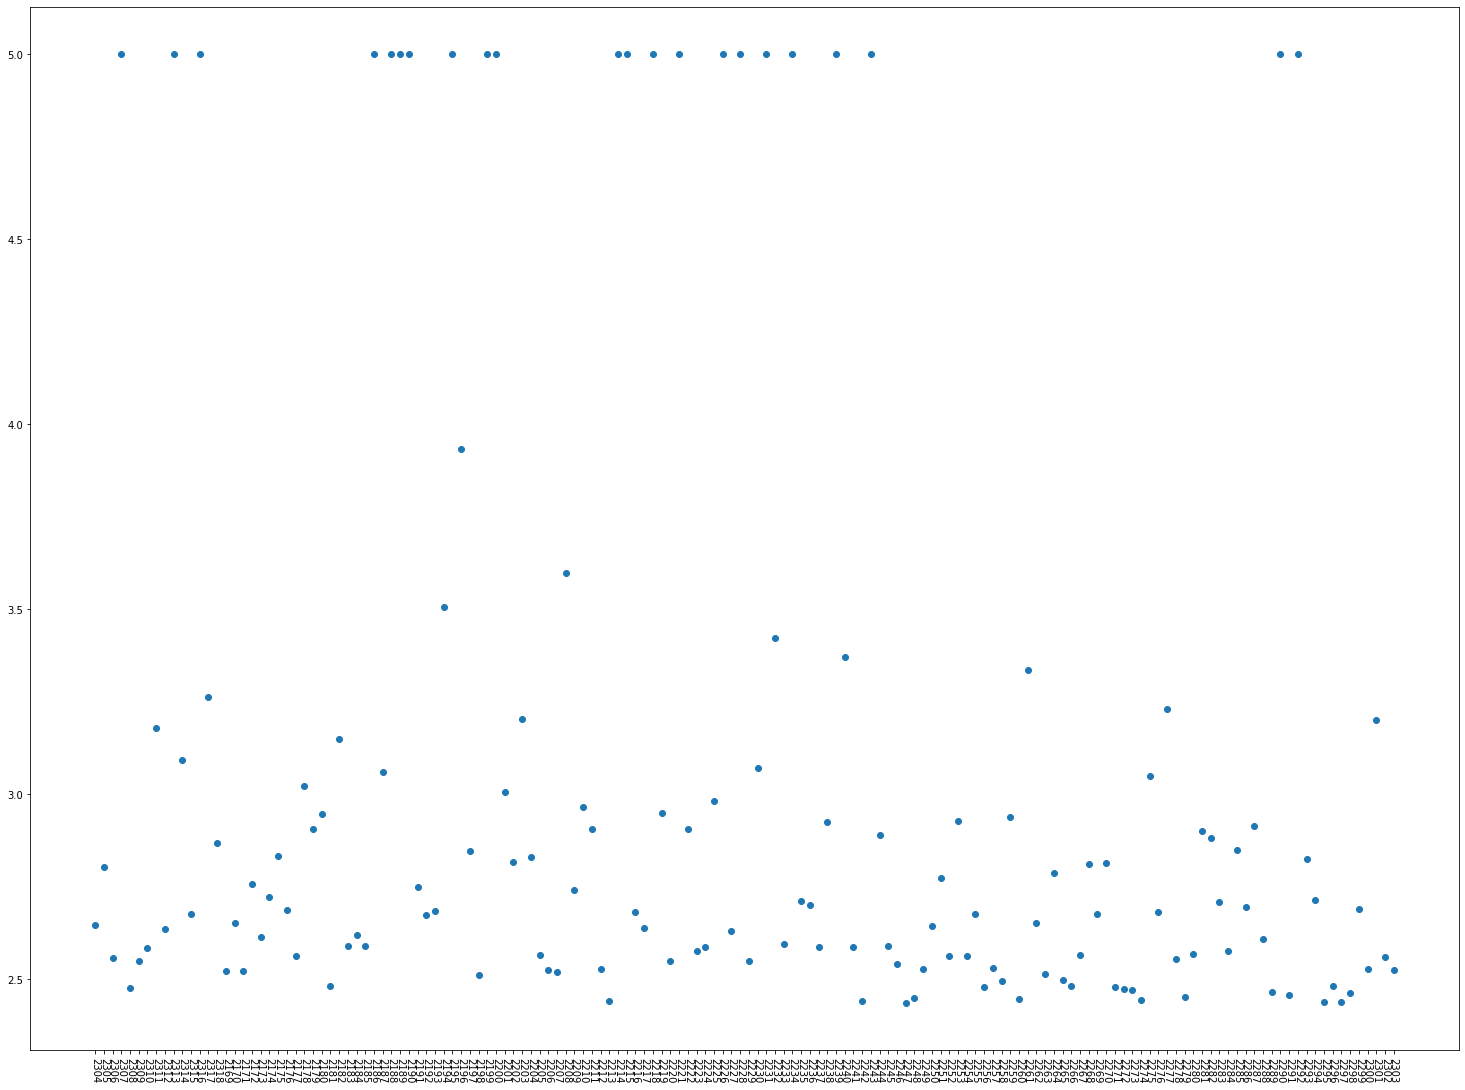

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25.6,19.2))
plt.xticks(rotation=270)
plt.scatter(node_suid, disease_score)

In [28]:
disease_score.describe()

count    150.000000
mean       3.062757
std        0.844256
min        2.435369
25%        2.553742
50%        2.691015
75%        3.041286
max        5.000000
Name: stringdb::disease score, dtype: float64

### Generate subnetworks
In order to reflect your exploration back onto the network, let’s generate subnetworks…

…from top quartile of ‘disease score’

In [29]:
top_quart = disease_score.quantile(q=0.75)

In [30]:
top_quart

3.04128575

In [31]:
top_nodes = disease_score[disease_score > top_quart].index.values.astype(str)

In [32]:
top_nodes.tolist()

['2307',
 '2311',
 '2313',
 '2314',
 '2316',
 '2317',
 '2182',
 '2186',
 '2187',
 '2188',
 '2189',
 '2190',
 '2194',
 '2195',
 '2196',
 '2199',
 '2200',
 '2203',
 '2208',
 '2214',
 '2215',
 '2218',
 '2221',
 '2226',
 '2228',
 '2230',
 '2231',
 '2232',
 '2234',
 '2239',
 '2240',
 '2243',
 '2261',
 '2275',
 '2277',
 '2290',
 '2292',
 '2301']

In [33]:
p4c.create_subnetwork(top_nodes.tolist(), subnetwork_name='top disease quartile')
#returns a Cytoscape network SUID

3978

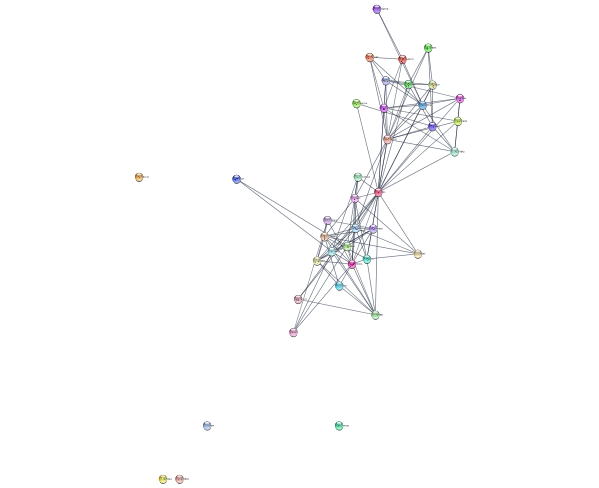

In [34]:
p4c.notebook_show_image()

…of connected nodes only

In [35]:
p4c.create_subnetwork(edges='all',subnetwork_name='top disease quartile connected')  #handy way to exclude unconnected nodes!

4149

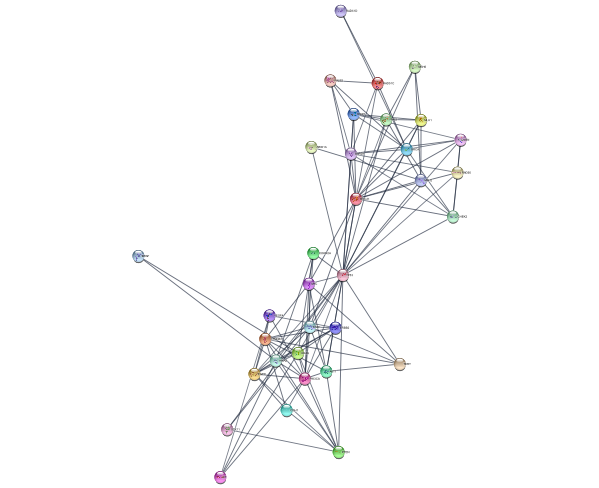

In [36]:
p4c.notebook_show_image()

…from first neighbors of top disease score genes, using the network connectivity together with the data to direct discovery.

In [38]:
p4c.set_current_network(network="STRING network - ovarian cancer")

{}

In [39]:
max(disease_score)

5.0

In [43]:
top_nodes = disease_score[disease_score==max(disease_score)].index.values.astype(str).tolist()

In [44]:
top_nodes

['2307',
 '2313',
 '2316',
 '2186',
 '2188',
 '2189',
 '2190',
 '2195',
 '2199',
 '2200',
 '2214',
 '2215',
 '2218',
 '2221',
 '2226',
 '2228',
 '2231',
 '2234',
 '2239',
 '2243',
 '2290',
 '2292']

In [46]:
p4c.select_nodes(nodes=top_nodes)

{'nodes': [2226,
  2290,
  2195,
  2292,
  2228,
  2231,
  2199,
  2200,
  2234,
  2239,
  2307,
  2243,
  2214,
  2215,
  2313,
  2218,
  2186,
  2188,
  2316,
  2189,
  2221,
  2190],
 'edges': []}

In [47]:
p4c.select_first_neighbors()

{'nodes': [2290,
  2291,
  2292,
  2293,
  2297,
  2298,
  2300,
  2301,
  2303,
  2304,
  2306,
  2307,
  2308,
  2309,
  2310,
  2313,
  2314,
  2316,
  2317,
  2318,
  2169,
  2172,
  2173,
  2174,
  2176,
  2179,
  2180,
  2183,
  2184,
  2185,
  2186,
  2187,
  2188,
  2189,
  2190,
  2191,
  2194,
  2195,
  2196,
  2197,
  2198,
  2199,
  2200,
  2201,
  2202,
  2203,
  2204,
  2207,
  2210,
  2212,
  2214,
  2215,
  2216,
  2217,
  2218,
  2219,
  2221,
  2222,
  2223,
  2224,
  2226,
  2227,
  2228,
  2230,
  2231,
  2232,
  2233,
  2234,
  2235,
  2237,
  2238,
  2239,
  2240,
  2241,
  2242,
  2243,
  2244,
  2245,
  2255,
  2256,
  2259,
  2260,
  2261,
  2262,
  2263,
  2264,
  2266,
  2268,
  2269,
  2271,
  2272,
  2274,
  2275,
  2280,
  2281,
  2283,
  2285],
 'edges': []}

In [48]:
p4c.create_subnetwork('selected', subnetwork_name='top disease neighbors') # selected nodes, all connecting edges (default)

4315

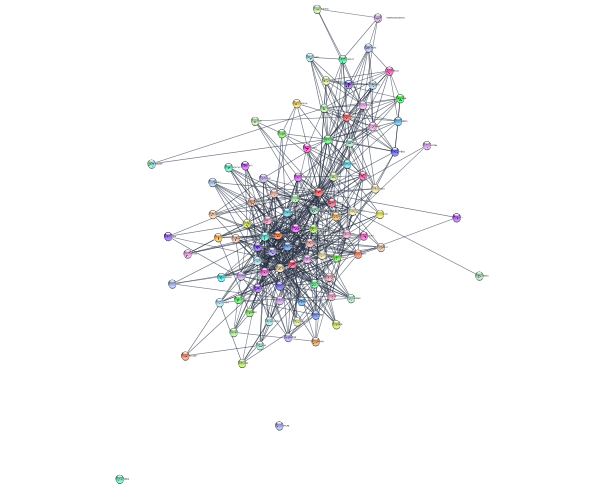

In [49]:
p4c.notebook_show_image()

…from diffusion algorithm starting with top disease score genes, using the network connectivity in a more subtle way than just first-degree neighbors.

In [51]:
p4c.set_current_network(network="STRING network - ovarian cancer")

{}

In [52]:
p4c.select_nodes(nodes=top_nodes)

{'nodes': [2226,
  2290,
  2195,
  2292,
  2228,
  2231,
  2199,
  2200,
  2234,
  2239,
  2307,
  2243,
  2214,
  2215,
  2313,
  2218,
  2186,
  2188,
  2316,
  2189,
  2221,
  2190],
 'edges': []}

In [53]:
p4c.commands_post('diffusion diffuse') # diffusion!

{'heatColumn': 'diffusion_output_heat', 'rankColumn': 'diffusion_output_rank'}

In [54]:
p4c.create_subnetwork('selected', subnetwork_name='top disease diffusion')

5036

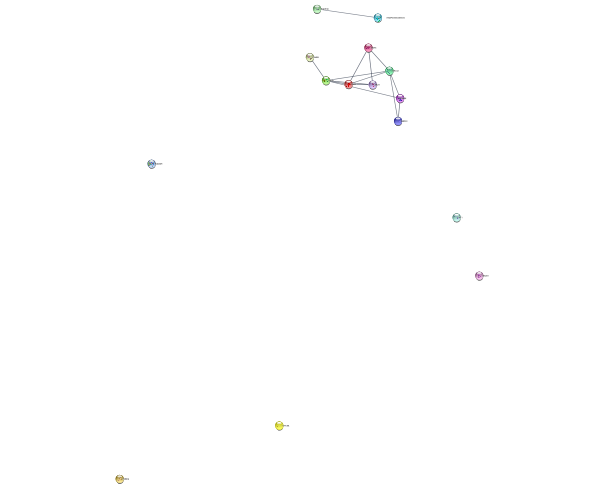

In [55]:
p4c.notebook_show_image()

In [56]:
p4c.layout_network('force-directed')

{}

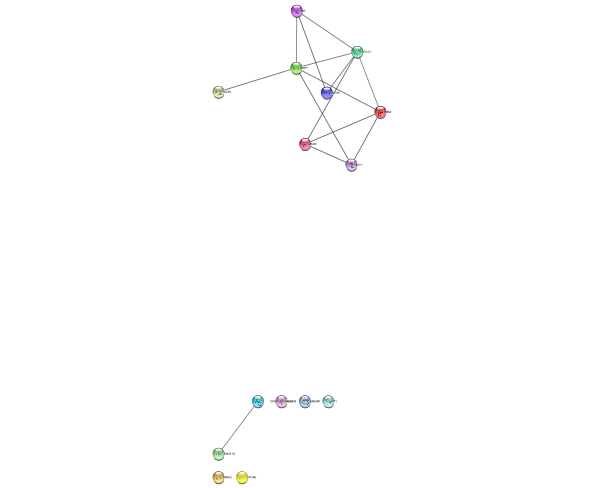

In [57]:
p4c.notebook_show_image()

Pro-tip: don’t forget to **p4c.set_current_network()** to the correct parent network before getting table column data and making selections.